In [1]:
import pandas as pd

dataset = pd.read_csv("income.csv")
print("dataset length:", len(dataset))
dataset.head()

dataset length: 26215


,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40


There is a hyphen in the 'marital-status' column which will cause problems later so we will replace the hyphen with underscore.

In [2]:
dataset.rename(columns={'marital-status': 'marital_status'}, inplace=True)
dataset.rename(columns={'hours-per-week': 'hours_per_week'}, inplace=True)

#### Dealing with missing values
##### 1) identify if there is any missing value in the dataset

In [3]:
# check if these is any missing value in the dataset
dataset.isna().sum()

income               0
age                  0
workclass         1396
education            0
marital_status       0
occupation        1401
relationship         0
race                 0
sex                  0
hours_per_week       0
dtype: int64

There are 1396 missing values in workclass and 1401 missing values in occupation. This is porpotionally small compared to the 26215 rows in total so we can drop these rows without affecting the data.

In [4]:
##### 2) Drop the rows which has missing values

In [5]:
# dealing with missing values, since we only have very small number of missing values in our dataset, we can just remove it for easy processing
dataset = dataset.dropna()
print("dataset length:", len(dataset))

dataset length: 24814


In [6]:
# Check variable data types
dataset.dtypes

income             int64
age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
dtype: object

#### Dealing with duplicated rows
##### 1) Check if there is any duplicated rows in the dataset

In [7]:
# check if these is any duplicated rows
dataset.duplicated().any()

True

In [8]:
# remove duplicate
dataset = dataset.drop_duplicates()
print("dataset length:", len(dataset))

dataset length: 21537


There are 24814 - 21537 = 3277 duplicated rows that were removed. This step ensures that the data is unique.

#### Get a summary of numerical columns

The target variable income is not supposed to be a numeric label, rather a boolean variable with 0 and 1.

#### Handling categorical variables
##### 1) check value count for the categorical and  variables
including workclass, education, marital-status, occupation, relationship, race and sex

In [9]:
dataset.columns.values.tolist()

['income',
 'age',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours_per_week']

In [10]:
# check value count for the categorical variables
print(dataset.workclass.value_counts(),"\n")
print(dataset.education.value_counts(),"\n")
print(dataset.marital_status.value_counts(), "\n")
print(dataset.occupation.value_counts(), "\n")
print(dataset.relationship.value_counts(), "\n")
print(dataset.race.value_counts(), "\n")
print(dataset.sex.value_counts())

Private             15108
Self-emp-not-inc     1999
Local-gov            1656
State-gov            1021
Self-emp-inc          951
Federal-gov           793
Without-pay             9
Name: workclass, dtype: int64 

HS-grad         6442
Some-college    4668
Bachelors       3701
Masters         1324
Assoc-voc       1007
Assoc-acdm       814
11th             718
10th             592
Prof-school      487
7th-8th          427
Doctorate        356
9th              355
12th             296
5th-6th          212
1st-4th          104
Preschool         34
Name: education, dtype: int64 

Married       10291
NotMarried     6752
Separated      3848
Widowed         646
Name: marital_status, dtype: int64 

Prof-specialty       3212
Exec-managerial      3017
Sales                2597
Adm-clerical         2589
Craft-repair         2489
Other-service        2244
Machine-op-inspct    1302
Transport-moving     1136
Handlers-cleaners     862
Farming-fishing       752
Tech-support          692
Protective-serv

#### 2) Deal with ordinal variables
transform the strings to numbers

In [11]:
#Ordinal encoding
dataset['education'] = dataset['education'].replace({'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, 
                                                      '9th': 5, '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9,
                                                     'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13,
                                                     'Masters': 14, 'Prof-school': 15, 'Doctorate': 16})
dataset.head()

,income,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week
0,0,39,State-gov,13,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,13,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,9,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,13,Married,Prof-specialty,Wife,Black,Female,40


#### 3) Deal with nominal variables
transform nominal variable into dummy variables: 

In [12]:
dataset = pd.get_dummies(dataset, columns=['workclass', 'marital_status', 'occupation', 'relationship', 'race']).astype('category')
dataset.head() 

,income,age,education,sex,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,39,13,Male,40,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,50,13,Male,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,38,9,Male,40,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,53,7,Male,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,28,13,Female,40,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


Since sex is binary variable, we can use 0 to represent Male and 1 to represent female

In [13]:
dataset['sex'] = dataset['sex'].replace({'Male': 1, 'Female': 0}).astype('category')
dataset.head() 

,income,age,education,sex,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,39,13,1,40,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,50,13,1,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,38,9,1,40,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,53,7,1,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,28,13,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


##### Check dataset shape

In [14]:
dataset.shape

(21537, 41)

In [15]:
dataset['age']=dataset.age.astype('uint8')
dataset['hours_per_week']=dataset.hours_per_week.astype('uint8')

In [16]:
dataset.dtypes

income                          category
age                                uint8
education                       category
sex                             category
hours_per_week                     uint8
workclass_Federal-gov           category
workclass_Local-gov             category
workclass_Private               category
workclass_Self-emp-inc          category
workclass_Self-emp-not-inc      category
workclass_State-gov             category
workclass_Without-pay           category
marital_status_Married          category
marital_status_NotMarried       category
marital_status_Separated        category
marital_status_Widowed          category
occupation_Adm-clerical         category
occupation_Armed-Forces         category
occupation_Craft-repair         category
occupation_Exec-managerial      category
occupation_Farming-fishing      category
occupation_Handlers-cleaners    category
occupation_Machine-op-inspct    category
occupation_Other-service        category
occupation_Priv-

In [17]:
dataset.describe()

,age,hours_per_week
count,21537.000000,21537.000000
mean,39.407624,41.478015
std,13.203134,12.501092
min,17.000000,1.000000
25%,29.000000,40.000000
50%,38.000000,40.000000
75%,48.000000,47.000000
max,90.000000,99.000000


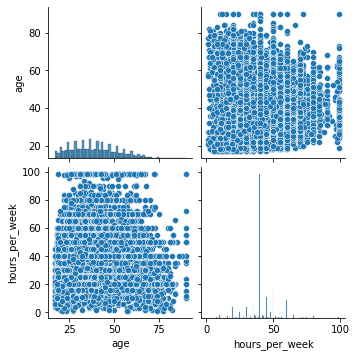

In [18]:
#correlation analysis
import seaborn as sns
sns.pairplot(dataset)

##### Define the input variables and the target variable
target variable is the first variable income, and input variables are the rest of the columns.

In [19]:
array = dataset.values
X = array[:,1:]
y = array[:,0]

### Split the dataset and normalize data

##### Split the training and testing dataset
use 10% of dataset for testing with a random state of 1

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

##### Apply normalization on both train and testing dataset

In [21]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

### Train model with logistic regression and SVM for classification, based on entire training dataset and then evaluate the model based on testing dataset

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# logistic regression model, parameters can be changed
model = LogisticRegression(solver="liblinear")
model.fit(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print("Testing Accuracy of LR:", test_score)

# Support Vector Machine for classification, parameters can be changed
model = SVC()
model.fit(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print("Testing Accuracy of SVC:", test_score)

Testing Accuracy of LR: 0.7887650882079852
Testing Accuracy of SVC: 0.7924791086350975


### Train a model with 10-fold cross valiation

##### Define a 10 fold cross validation with data shufflling and set the random state with 2

In [23]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=2)

In [24]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver="liblinear")
resultslr = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of LR:",resultslr.mean())

model = SVC()
resultssvc = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of SVM:",resultssvc.mean())

Average Accuracy of LR: 0.8083362206748556
Average Accuracy of SVM: 0.7999268185328473


### Optimize the Logistic Regression models with cross validation

In [25]:
# fine tune parameters for logistic regression model
from sklearn.model_selection import GridSearchCV

grid_params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.001, 0.1],
    'solver': ['saga', 'liblinear']
}

lr = LogisticRegression(max_iter=1000)
gs_lr_result = GridSearchCV(lr, grid_params_lr, cv=kfold).fit(X_train_norm, y_train)
print(gs_lr_result.best_score_)

0.8074589744695142


### Evaluate the trained Logistic Regression model using testing dataset

In [26]:
test_accuracy = gs_lr_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7892293407613742


check the parameter setting for the best selected model

In [27]:
gs_lr_result.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

### Optimize the SVM models with the same steps

In [28]:
from sklearn.model_selection import GridSearchCV

grid_params_svc = {
    'kernel': ['linear', 'poly'],
    'C': [1, 10],
    'degree': [3, 8],
    'gamma': ['auto','scale']
}

svc = SVC()
gs_svc_result = GridSearchCV(svc, grid_params_svc, cv=kfold).fit(X_train_norm, y_train)
print(gs_svc_result.best_score_)

0.8064787419813071


In [29]:
#Evaluate the trained SVC model using testing dataset
test_accuracy = gs_svc_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7948003714020427


In [30]:
#check the parameter setting for the best selected model
gs_svc_result.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

### build a kmeans model with 2 clusters

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_norm)

#### check how many data samples in each cluster

In [32]:
import numpy as np
kmeans_labels = kmeans.labels_
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
dict(zip(unique_labels, unique_counts))

{0: 9222, 1: 10161}

#### Extract prototype for each cluster

In [33]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

kmeans_cluster_centers = kmeans.cluster_centers_
closest = pairwise_distances_argmin(kmeans.cluster_centers_, X_train_norm)

# show the two data samples that can represent the two clusters
dataset.iloc[closest, :]

,income,age,education,sex,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
11540,0,28,9,0,32,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6945,0,56,10,1,45,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Check accuracy of the clustering model

In [34]:
from sklearn.metrics import accuracy_score

kmeans_labels = kmeans.predict(X_test)

accuracy = accuracy_score(y_test, kmeans_labels)
print("k means prediction accuracy:", accuracy)

k means prediction accuracy: 0.6903435468895079
